In [1]:
import pandas as pd

In [9]:
df_customer = pd.read_csv('/Users/hapresent/Desktop/데이터톤/0808/customer_범위수정.csv')

In [15]:
df_customer.head(2)

,customer_id,gender,birthdate,first_join_date,age,age_group
0,2870,F,1996-06-14,2019-07-21,25,20대
1,8193,F,1993-08-16,2017-07-16,28,20대


In [17]:
df_transaction = pd.read_csv('/Users/hapresent/Desktop/데이터톤/0808/transaction_범위수정.csv')

In [21]:
df_transaction.head(2)

,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount,product_id,quantity,item_price,price_label
0,2018-07-29 15:22:01,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,199832,54728,1,191247,middle price
1,2018-07-30 12:40:22,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,NaN,155526,16193,1,145526,middle price


In [23]:
df_cart= pd.read_csv('/Users/hapresent/Desktop/데이터톤/0808/add_to_cart(장바구니에서 결제시도한사람들 고객 목록).csv')

In [25]:
df_cart

,session_id,event_name,event_time,product_id,quantity,item_price,price_label,customer_id
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763,15315,4,313529,high price,18770.0
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431,6133,2,249443,low price,18770.0
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:23:36.425431,6721,1,134504,middle price,18770.0
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:42:03.425431,57622,1,384716,middle price,18770.0
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:58:58.425431,5490,1,121318,middle price,18770.0
...,...,...,...,...,...,...,...,...
1497757,b3358d2e-58bf-4152-9740-e563d58108b7,ADD_TO_CART,2021-11-04 16:17:16.272361,51847,1,290839,high price,21281.0
1497758,f38416ce-51f2-46b0-a476-776d8fed1cb0,ADD_TO_CART,2021-08-01 08:02:26.737783,4869,1,282771,middle price,82032.0
1497759,c1ce86f6-858b-4009-af5b-f1483a28d020,ADD_TO_CART,2020-09-22 22:45:47.674560,25127,1,166365,low price,42455.0
1497760,ad1063b0-a6e5-40a9-aed6-d1b45741e571,ADD_TO_CART,2021-06-07 04:38:05.354381,13143,1,284949,low price,44381.0


In [27]:
# 2-1. 구매 데이터(df_transaction)를 세션 단위로 집계하기

# 1. 구매가 성공(Success)한 데이터만 사용하기 위해 필터링합니다.
df_success_tx = df_transaction[df_transaction['payment_status'] == 'Success'].copy()

# 2. 각 세션(session_id)에서 가장 많이 구매된 상품의 가격대(최빈값)를 찾습니다.
#    - as_index=False를 사용하면 session_id와 customer_id가 열로 유지됩니다.
#    - .agg(pd.Series.mode)는 최빈값을 계산하며, 여러 개일 경우를 대비해 [0]으로 첫 번째 값을 선택합니다.
buy_labels_by_session = df_success_tx.groupby(['session_id', 'customer_id'])['price_label'].agg(lambda x: x.mode().iat[0]).reset_index()

# 3. 분석에 사용할 컬럼 이름을 명확하게 'buy_price_label'로 변경합니다.
buy_labels_by_session.rename(columns={'price_label': 'buy_price_label'}, inplace=True)

# 4. 중간 결과 확인 (세션별 구매 성향)
print("--- [중간 결과 1] 세션별 구매 성향 (상위 5개) ---")
print(buy_labels_by_session.head())
print("\n" + "="*50 + "\n")


# 2-2. 장바구니 데이터(df_cart)를 세션 단위로 집계하기

# 1. 각 세션(session_id)에서 가장 많이 장바구니에 담긴 상품의 가격대(최빈값)를 찾습니다.
cart_labels_by_session = df_cart.groupby(['session_id', 'customer_id'])['price_label'].agg(lambda x: x.mode().iat[0]).reset_index()

# 2. 컬럼 이름을 'cart_price_label'로 변경합니다.
cart_labels_by_session.rename(columns={'price_label': 'cart_price_label'}, inplace=True)

# 3. 중간 결과 확인 (세션별 장바구니 성향)
print("--- [중간 결과 2] 세션별 장바구니 성향 (상위 5개) ---")
print(cart_labels_by_session.head())

--- [중간 결과 1] 세션별 구매 성향 (상위 5개) ---
                             session_id  customer_id buy_price_label
0  00001f29-3ede-4445-95f0-0178934e32ba        74433      high price
1  00003eca-954b-4150-aee1-63fc62f395cf        43805    middle price
2  0000425b-ddc8-4459-a240-6ba814dac132        90074    middle price
3  0000649b-9514-4600-979b-42166a798996        16868       low price
4  00008762-b685-4f96-87bb-e27f20bb17be        31159    middle price


--- [중간 결과 2] 세션별 장바구니 성향 (상위 5개) ---
                             session_id  customer_id cart_price_label
0  00001f29-3ede-4445-95f0-0178934e32ba      74433.0       high price
1  00003eca-954b-4150-aee1-63fc62f395cf      43805.0     middle price
2  0000425b-ddc8-4459-a240-6ba814dac132      90074.0     middle price
3  0000649b-9514-4600-979b-42166a798996      16868.0     middle price
4  00008762-b685-4f96-87bb-e27f20bb17be      31159.0     middle price


In [28]:
# 1. 위에서 만든 두 개의 데이터프레임을 'session_id'와 'customer_id'를 기준으로 합칩니다.
#    how='inner' 옵션을 사용해 장바구니 활동과 '구매 성공' 활동이 모두 있는 세션만 분석 대상으로 합니다.
df_session_analysis = pd.merge(
    cart_labels_by_session,
    buy_labels_by_session,
    on=['session_id', 'customer_id'],
    how='inner'
)

# 2. 최종 분석용 데이터셋 확인
print("\n" + "="*50 + "\n")
print("--- [최종 결과] 분석용 데이터셋 (상위 5개) ---")
print(df_session_analysis.head())

# 3. 이 데이터셋의 크기 확인
print(f"\n분석 대상이 되는 총 세션의 수: {len(df_session_analysis)}개")



--- [최종 결과] 분석용 데이터셋 (상위 5개) ---
                             session_id  customer_id cart_price_label  \
0  00001f29-3ede-4445-95f0-0178934e32ba      74433.0       high price   
1  00003eca-954b-4150-aee1-63fc62f395cf      43805.0     middle price   
2  0000425b-ddc8-4459-a240-6ba814dac132      90074.0     middle price   
3  0000649b-9514-4600-979b-42166a798996      16868.0     middle price   
4  00008762-b685-4f96-87bb-e27f20bb17be      31159.0     middle price   

  buy_price_label  
0      high price  
1    middle price  
2    middle price  
3       low price  
4    middle price  

분석 대상이 되는 총 세션의 수: 624878개


In [63]:
df_session_analysis

,session_id,customer_id,cart_price_label,buy_price_label,label_changed
0,00001f29-3ede-4445-95f0-0178934e32ba,74433.0,high price,high price,False
1,00003eca-954b-4150-aee1-63fc62f395cf,43805.0,middle price,middle price,False
2,0000425b-ddc8-4459-a240-6ba814dac132,90074.0,middle price,middle price,False
3,0000649b-9514-4600-979b-42166a798996,16868.0,middle price,low price,True
4,00008762-b685-4f96-87bb-e27f20bb17be,31159.0,middle price,middle price,False
...,...,...,...,...,...
624873,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,544.0,low price,low price,False
624874,ffffd3d9-79db-459e-a427-388204a7aac7,15566.0,middle price,high price,True
624875,ffffdf8e-dea1-42bc-9839-7662675c0d38,65771.0,high price,high price,False
624876,fffff7cf-2a18-4303-9c12-aa836ae3b543,2353.0,low price,low price,False


--- 구매 성향 변화 비율 ---
전체 624878개 세션 중 78725개 세션에서 가격대 변화 발생
가격대 유지 비율: 87.4%
가격대 변화 비율: 12.6%




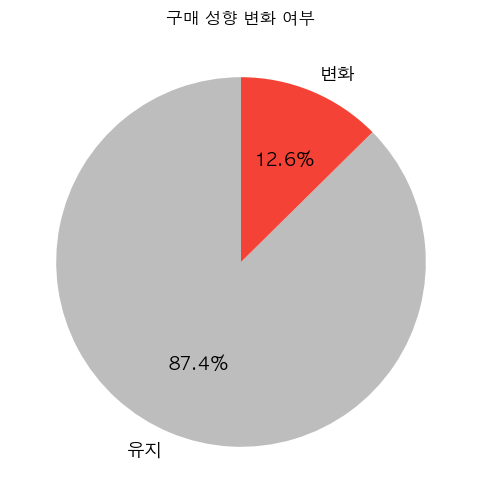

In [59]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# 한글 폰트 설정 (Mac 사용자의 경우)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 각 세션별로 장바구니 가격대와 구매 가격대가 다른지 여부를 True/False로 계산합니다.
df_session_analysis['label_changed'] = (
    df_session_analysis['cart_price_label'] != df_session_analysis['buy_price_label']
)

# 2. 변화 여부(True/False)의 비율을 계산합니다.
change_counts = df_session_analysis['label_changed'].value_counts()
change_rate = df_session_analysis['label_changed'].mean() * 100

print(f"--- 구매 성향 변화 비율 ---")
print(f"전체 {len(df_session_analysis)}개 세션 중 {change_counts.get(True, 0)}개 세션에서 가격대 변화 발생")
print(f"가격대 유지 비율: {100-change_rate:.1f}%")
print(f"가격대 변화 비율: {change_rate:.1f}%")
print("\n" + "="*50 + "\n")


# 3. 파이 차트로 시각화합니다.
plt.figure(figsize=(6, 6))
plt.pie(
    change_counts,
    labels=['유지', '변화'],
    autopct='%.1f%%',
    startangle=90,
     textprops={'fontsize': 13},
    colors=['#BDBDBD', '#F44336'] # 회색, 빨강색
)
plt.title('구매 성향 변화 여부')
plt.show()

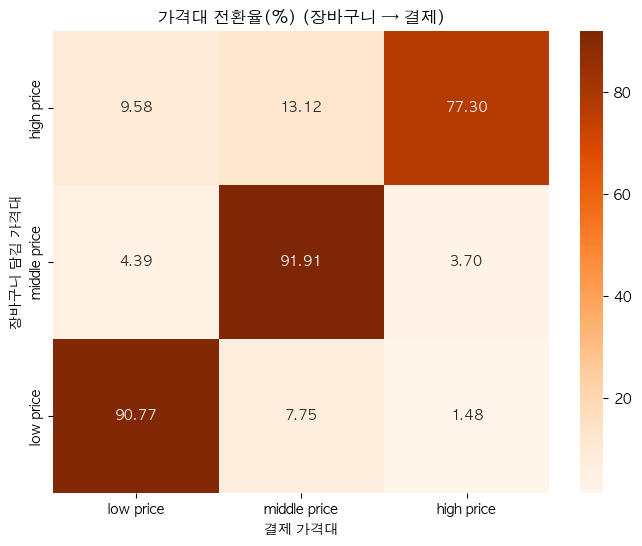

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Mac 사용자의 경우)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# --- 이 부분은 이전 단계에서 이미 실행하셨겠지만, 완전한 코드를 위해 포함합니다 ---
# 교차표(crosstab)를 만들어 전환 횟수를 계산합니다.
transition_matrix = pd.crosstab(
    df_session_analysis['cart_price_label'],
    df_session_analysis['buy_price_label']
)
# 각 행을 기준으로 전환 '비율(%)'을 계산합니다.
transition_ratio = transition_matrix.div(transition_matrix.sum(axis=1), axis=0) * 100
# --------------------------------------------------------------------------


# 1. X축(가로)과 Y축(세로)의 순서를 각각 지정합니다.
price_order_x = ['low price', 'middle price', 'high price']
price_order_y = ['high price', 'middle price', 'low price'] # <<< Y축 순서를 뒤집어 왼쪽 하단으로 low price를 보냅니다.

# 2. 행(세로)과 열(가로)의 순서를 위에서 지정한 순서대로 재정렬합니다.
transition_ratio_reordered = transition_ratio.reindex(index=price_order_y, columns=price_order_x)

# 3. 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(
    transition_ratio_reordered,
    annot=True,          # 각 셀에 숫자 표시
    fmt='.2f',           # 소수점 둘째 자리까지 표시
    cmap='Oranges'       # 색상 맵
)
plt.title('가격대 전환율(%) (장바구니 → 결제)')
plt.xlabel('결제 가격대')
plt.ylabel('장바구니 담김 가격대')
plt.show()

In [35]:
# 1. 이전에 만들어둔 고객 정보 데이터프레임을 다시 불러옵니다.
#    (이미 불러온 상태라면 이 코드는 생략 가능합니다)
df_customer = pd.read_csv('/Users/hapresent/Desktop/데이터톤/0808/customer_범위수정.csv')

# 2. 'df_session_analysis'와 'df_customer'를 'customer_id'를 기준으로 합칩니다.
#    분석에 필요한 성별, 연령대 정보만 선택해서 가져옵니다.
df_final_analysis = pd.merge(
    df_session_analysis,
    df_customer[['customer_id', 'gender', 'age_group']],
    on='customer_id',
    how='left' # 세션 데이터 기준으로 고객 정보를 붙입니다.
)

# 3. 고객 정보가 없는 일부 데이터(결측치)는 분석에서 제외합니다.
df_final_analysis.dropna(inplace=True)

# 4. 최종 분석 데이터 확인
print("--- [최종 분석 데이터 + 고객 정보] (상위 5개) ---")
print(df_final_analysis.head())

--- [최종 분석 데이터 + 고객 정보] (상위 5개) ---
                             session_id  customer_id cart_price_label  \
0  00001f29-3ede-4445-95f0-0178934e32ba      74433.0       high price   
1  00003eca-954b-4150-aee1-63fc62f395cf      43805.0     middle price   
2  0000425b-ddc8-4459-a240-6ba814dac132      90074.0     middle price   
3  0000649b-9514-4600-979b-42166a798996      16868.0     middle price   
4  00008762-b685-4f96-87bb-e27f20bb17be      31159.0     middle price   

  buy_price_label  label_changed gender age_group  
0      high price          False      F       20대  
1    middle price          False      F       30대  
2    middle price          False      M       20대  
3       low price           True      M       20대  
4    middle price          False      M       20대  


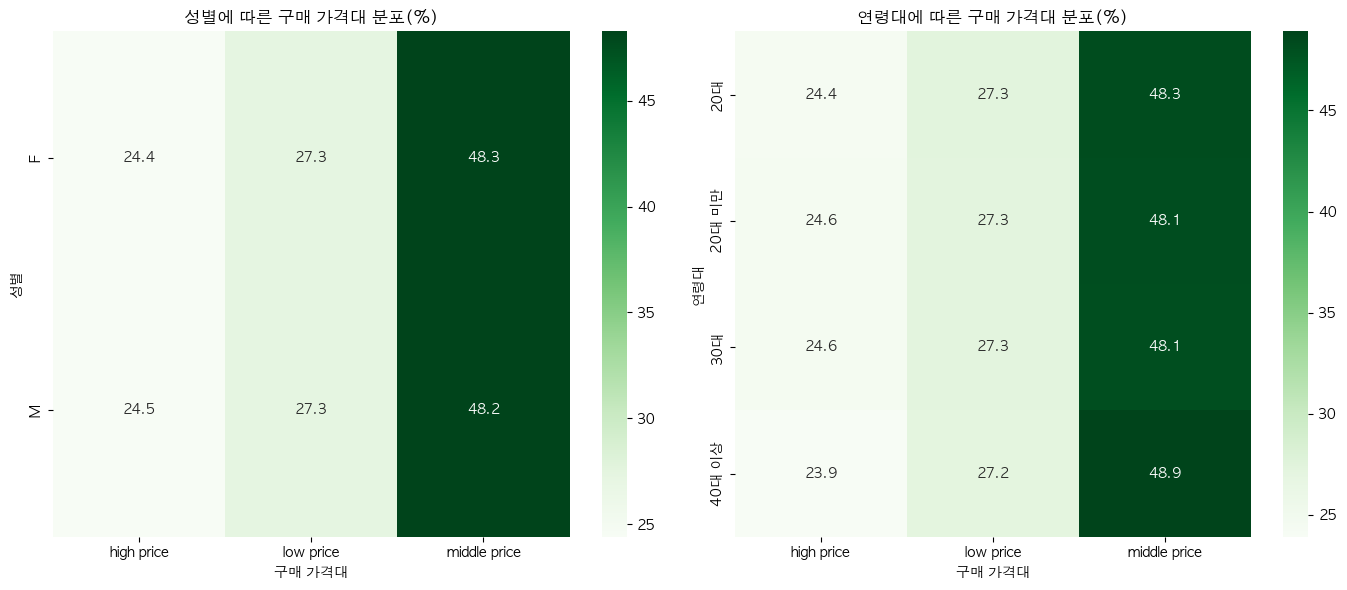

In [37]:
# 1. 성별에 따른 구매 가격대 분포 계산
gender_buy_ratio = pd.crosstab(
    df_final_analysis['gender'],
    df_final_analysis['buy_price_label'],
    normalize='index'
) * 100

# 2. 연령대에 따른 구매 가격대 분포 계산
age_buy_ratio = pd.crosstab(
    df_final_analysis['age_group'],
    df_final_analysis['buy_price_label'],
    normalize='index'
) * 100

# 3. 두 개의 히트맵을 나란히 시각화합니다.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(gender_buy_ratio, annot=True, fmt='.1f', cmap="Greens", ax=axes[0])
axes[0].set_title('성별에 따른 구매 가격대 분포(%)')
axes[0].set_xlabel('구매 가격대')
axes[0].set_ylabel('성별')

sns.heatmap(age_buy_ratio, annot=True, fmt='.1f', cmap="Greens", ax=axes[1])
axes[1].set_title('연령대에 따른 구매 가격대 분포(%)')
axes[1].set_xlabel('구매 가격대')
axes[1].set_ylabel('연령대')

plt.tight_layout()
plt.show()

--- 연령대별 가격대 유지/변화 건수 ---
label_changed   False  True 
age_group                   
20대 미만         120892  17444
20대            279383  40640
30대            125704  17817
40대 이상          20174   2824


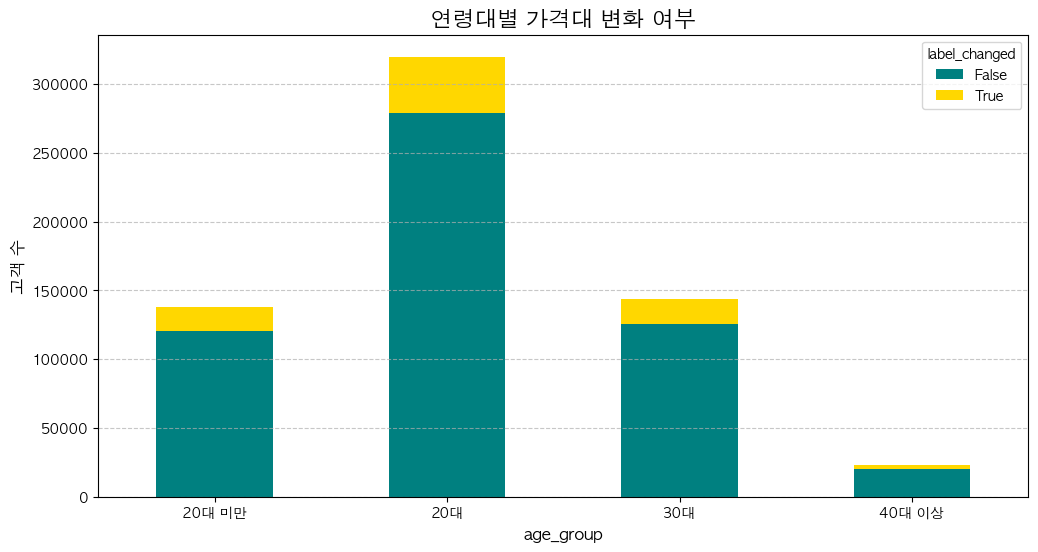

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Mac 사용자의 경우)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# --- 데이터 준비 (이전 단계에서 실행했지만, 코드의 완전성을 위해 포함) ---
# 연령대 순서를 원하는 대로 지정합니다.
age_order = ['20대 미만', '20대', '30대', '40대 이상']
df_final_analysis['age_group'] = pd.Categorical(
    df_final_analysis['age_group'],
    categories=age_order,
    ordered=True
)
# --------------------------------------------------------------------


# 1. 연령대별로 'label_changed' 값(True/False)의 개수를 계산합니다.
age_change_counts = pd.crosstab(
    df_final_analysis['age_group'],
    df_final_analysis['label_changed']
)

print("--- 연령대별 가격대 유지/변화 건수 ---")
print(age_change_counts)

# 2. 누적 막대그래프로 시각화합니다.
age_change_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['#008080', '#FFD700'] # 청록색, 금색 계열로 색상 변경
)

plt.title('연령대별 가격대 변화 여부', fontsize=16)
plt.xlabel('age_group', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.xticks(rotation=0) # x축 라벨을 수평으로 표시
plt.legend(title='label_changed')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

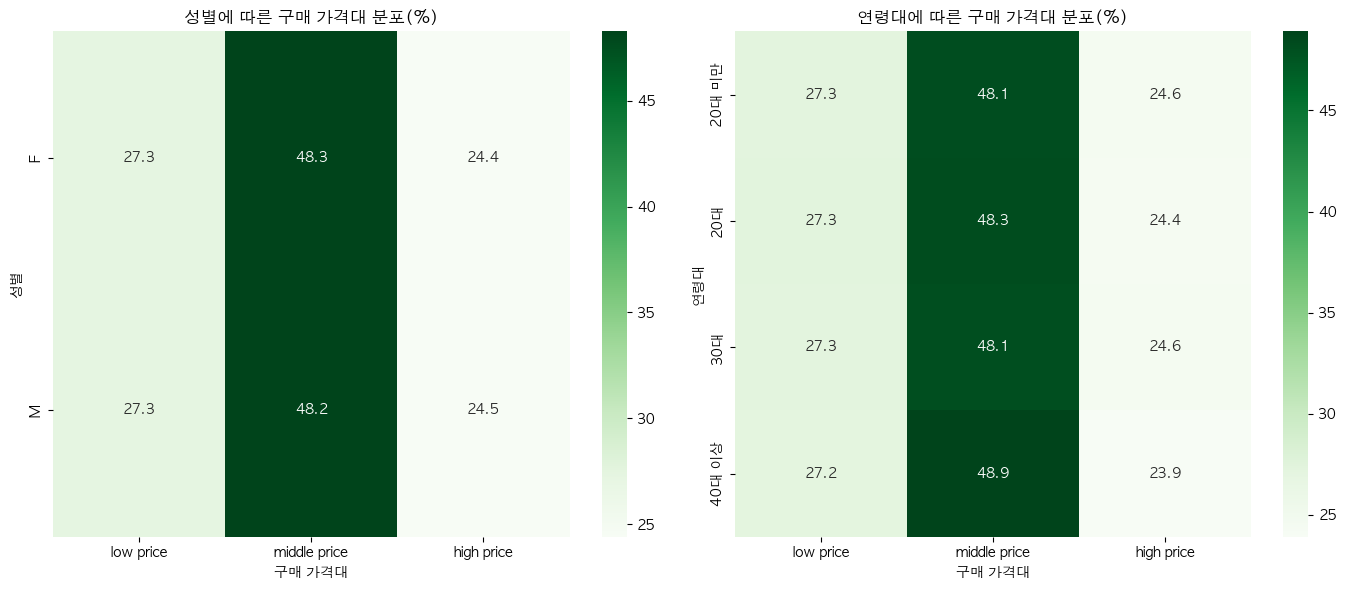

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Mac 사용자의 경우)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# --- 이 부분은 이전 단계에서 이미 실행하셨겠지만, 완전한 코드를 위해 포함합니다 ---
# 1. 성별에 따른 구매 가격대 분포 계산
gender_buy_ratio = pd.crosstab(
    df_final_analysis['gender'],
    df_final_analysis['buy_price_label'],
    normalize='index'
) * 100

# 2. 연령대에 따른 구매 가격대 분포 계산
age_buy_ratio = pd.crosstab(
    df_final_analysis['age_group'],
    df_final_analysis['buy_price_label'],
    normalize='index'
) * 100
# --------------------------------------------------------------------------


# 3. <<<--- [수정된 부분] ---<<<
#    컬럼(X축) 순서를 'low', 'middle', 'high'로 지정하고, 데이터프레임을 재정렬합니다.
price_order = ['low price', 'middle price', 'high price']
gender_buy_ratio = gender_buy_ratio.reindex(columns=price_order)
age_buy_ratio = age_buy_ratio.reindex(columns=price_order)
# --------------------------------------------------------------------------


# 4. 두 개의 히트맵을 나란히 시각화합니다.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(gender_buy_ratio, annot=True, fmt='.1f', cmap="Greens", ax=axes[0])
axes[0].set_title('성별에 따른 구매 가격대 분포(%)')
axes[0].set_xlabel('구매 가격대')
axes[0].set_ylabel('성별')

sns.heatmap(age_buy_ratio, annot=True, fmt='.1f', cmap="Greens", ax=axes[1])
axes[1].set_title('연령대에 따른 구매 가격대 분포(%)')
axes[1].set_xlabel('구매 가격대')
axes[1].set_ylabel('연령대')

plt.tight_layout()
plt.show()

In [65]:
# 장바구니 가격 성향을 구하기 전에
df_counts = df_cart.groupby('session_id')['price_label'].value_counts().unstack(fill_value=0)

# 동률인 세션만 필터링
ties = df_counts[(df_counts == df_counts.max(axis=1).values[:, None]).sum(axis=1) > 1]
print(f"동률 세션 수: {len(ties)}")
print(ties.head())


동률 세션 수: 109834
price_label                           high price  low price  middle price
session_id                                                               
0000a158-a793-4f64-ba52-660a24ff8af6           0          1             1
000128d0-c51c-411b-88e6-0cf5d9642d2d           1          0             1
0001a78a-8b54-4f40-915e-2f0bfc4240ec           0          1             1
00021716-af62-4a26-ac13-de3a41041d20           3          0             3
00035171-9b95-4404-8bd4-a1e46cb9baf6           0          1             1


In [67]:
#어떻게 처리하지...하